# GRIP @ The Sparks Foundation.

# Task 1:- Prediction Using Supervised ML

### Task to predict the score of a student who has studied for 9.5 hrs using supervised ML

# Author:- Siddhid Gopujkar

#### Importing all Libraries and reading data

In [80]:
# Importing all libraries

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [100]:
#reading data from the csv file
data = pd.read_csv("student_scores.csv")
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [82]:
# Check if there any null value in the Dataset
data.isnull == True

False

#### There is no null value in the Dataset so, we can now visualize our Data

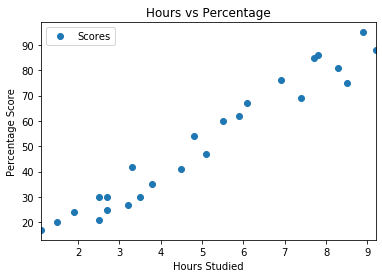

In [83]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### From the above scatter plot there looks to be correlation between the 'Marks Percentage' and 'Hours Studied', Lets plot a regression line to confirm the correlation.

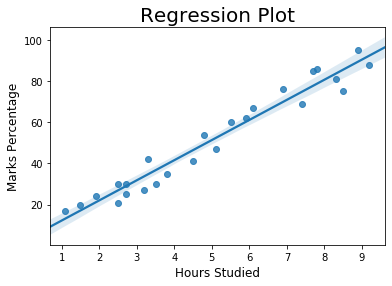

In [84]:
sb.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()


In [85]:
print(data.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


#### It is confirmed by regression plot that the variables are positively correlated.

## Training the Model

### 1. Splitting the Data

In [86]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

###  2. Fitting the Data into the model

In [87]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("---------Model Trained---------")

---------Model Trained---------


### Predicting the Percentage of Marks

In [88]:
print(test_X) # Testing data - In Hours
y_pred = regressor.predict(test_X) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [89]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': test_y, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033
5,35,39.678655
6,24,20.848407


### Visually Comparing the Predicted Marks with the Actual Marks

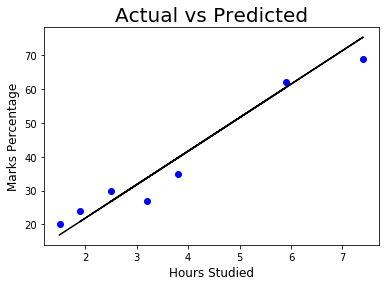

In [90]:
plt.scatter(x=test_X, y=test_y, color='blue')
plt.plot(test_X, y_pred, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

### Evaluating the model 

In [91]:
print('Mean absolute error: ',mean_absolute_error(test_y,y_pred))

Mean absolute error:  4.10707811546216


#### This mean absolute error of 4.10707811546216 tells us that the average difference the actual data value and the value predicted by the model is 4.10707811546216. 

#### The lower the Mean absolute error for a given model, the more closely the model is able to predict the actual values.

## What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [96]:
hours = [9.25]
answer = regression.predict([hours])
print(answer)
print("Score = {}".format(round(answer[0],4)))

[93.89272889]
Score = 93.8927


#### According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.8927 marks.